# *ISYE-6644 Mini-Project 1 - Dice Game Simulation (Prompt #9)*
### *Vivek Gawande & Sameer Vinayak*

## Abstract

The goal of this report is to explore the Dice Roll Game, which is described below in the Background & Description. Due to the nature of the game's rules, there is no predetermined number of "cycles" for which the game will last. Instead, the game ends when one of two players cannot perform a required action. Using python, we were able to create a simulation of the Dice Roll Game, which allowed us to replicate the playing of thousands of rounds of the games in a short amount of time. The result of this programmatic approach to the problem gave us the ability to answer many questions about the game, including the expected number of cycles in the Dice Roll Game. Using the rules as described, we found that the expected number of cycles for the Dice Roll Game is roughly **17.52**. We also found that small tweaks to the game's rule can have a large impact on the expected number of cycles.

## Background & Description

The basic idea of this project is to apply simulation techniques to understand the expected number of cycles in the Dice Roll Game and explore its distribution details. Simulation, using a random number generator to replicate the roll of a dice, is useful to easily run a large number of random experiments to discover relationships. While we did not pursue the following analysis within the scope of this project, we could also consider translating the dice roll probabilities into a transition matrix of a given absorptive Markov chain. A significant number of functionals on a Markov chain can be evaluated using a technique called first step analysis. This method proceeds by breaking down the possibilities that can arise at the end of the first transition, and then invoking the law of total probability coupled with the Markov property to establish a characterizing relationship among the unknown variables. More information can be found [here.](https://math.montana.edu/grad_students/writing-projects/2015/15tsidulko.pdf)

The dice roll game used for simulation includes two player using 6-sided dice tosses to win coins. The game starts with the initial setup of both players having 4 coins, with 2 coins in the common "pot". Players take turn rolling the die, and act on the die outcome based on the following mapping:

	• 1: then the player does nothing.
	• 2: then the player takes all coins in the pot.
	• 3: then the player takes half of the coins in the pot (rounded down). 
	• 4,5,6: then the player puts a coin in the pot. 
    
A player loses, and the game concludes, when they are unable to perform the task of putting a coin in the pot. We have not interpreted the pot being empty as a player being unable to perform the task of drawing from the pot - the player would simply draw 0 coins in this case, and the game continues on.

In the remainder of this report, we will build a simulation (developed using python) to explore the following:
	1. Expected number of cycles the game will last for
	2. The distribution of the expected number of cycles
	3. Further exploration - how tweaks to the game's rules can impact these results
    
Core code has been kept in the body of the implementation, below. After the conclusion, you can find additional code used primarily for the exploration of rule tweaks.

## Implementation & Main Findings

In [51]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
random.seed(998877)

Above, we import python's 'random' [library.](https://docs.python.org/3/library/random.html)
The library gives access to, among other functionality not used here, methods that can be used to generate random numbers. The module uses the **Mersenne Twister** pseudorandom number generator. While not without its drawbacks, the PRNG is widely accepted across software implentations as a fast, well-implemented PRNG. Mathematical details on the underlying algorithm can be found [here.](http://www.math.sci.hiroshima-u.ac.jp/m-mat/MT/ARTICLES/mt.pdf)

After importing the library, we set the seed for reproducibility.

In [52]:
class DiceGame:
    """
    Our python implementation of the Dice Roll Game.
    
    The __init__ method starts the game off as
    defined in the prompt.
    
    The play_game method executes the playing of a full game while tracking
    the number of cycles, winner, and pot amounts. It runs until the breaking
    condition, defined as the current player being unable to perform the task
    demanded by the most recent roll.
    """
    def __init__(self, first='a'):
        self.player_a = 4
        self.player_b = 4
        self.pot = 2
        self.cycles = 0
        self.first = first
        self.players = {'a':self.player_a,
                        'b':self.player_b}
        self.current_player = self.first
        self.winner = None
    
    def __roll(self):
        """
        random's randrange function is used to generate a random integer between
        0 and 5, inclusive. A 1 is added to this number to make the number equivalent
        to a dice roll number.
        """
        return random.randrange(6) + 1
    
    def play_game(self): 
        while True:
            if self.current_player == 'a':
                self.cycles +=1
            outcome = self.__roll()
            if self.cycles == 1:
                self.first = outcome

            if outcome == 1:
                continue
            elif outcome == 2:
                self.players[self.current_player] += self.pot
                self.pot = 0
            elif outcome == 3:
                half_pot = self.pot // 2
                self.players[self.current_player] += half_pot
                self.pot -= half_pot
            else:
                if self.players[self.current_player] == 0:
                    self.winner = 'a' if self.current_player == 'b' else 'b'
                    break
                self.players[self.current_player] -= 1
                self.pot += 1
            
            self.current_player = 'a' if self.current_player == 'b' else 'b'

### Expected Value

In order to ascertain the Expected Value of the number of cycles required to
complete a game of Dice Roll, we simulate the game 10,000 times below.

The number for n, 10,000, was chosen somewhat arbitrarily - it gives us the ability
to feel confident that the number of iterations is sufficient to approach
the true Expected Value and avoid overweighting of outliers, while not being overly 
computationally and time intensive.

In [53]:
def simulate_n_games(game_object, n=10000, plot=True):
    """
    This helper function is used to execute the DiceGame
    class n times. After running n times, the function
    produces a histogram of cycle frequencies,
    noting the mean value of the cycles from the
    n iterations of the game. This is taken to
    represent the expected value, or how long, on
    average, a game of Dice Roll will last.
    """
    number_of_cycles = []
    for i in range(n):
        game = game_object()
        game.play_game()
        number_of_cycles.append(game.cycles)
    
    mean_cycles = np.mean(number_of_cycles)
    std_cycles = np.std(number_of_cycles)
    
    if plot:
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111)
        ax.hist(number_of_cycles, bins = len(set(number_of_cycles)),
                color='green' if game_object == DiceGame else 'orange', alpha=.5);
        ax.set_title(str(n) + " Simulations of Dice Game");
        plt.grid(True, alpha=.5)
        ax.set_xlabel('Cycles');
        ax.set_ylabel('Frequency');
        plt.axvline(mean_cycles, color='red', ls='--', lw='3')
        plt.show();
        print("Mean # of cycles per game: " + str(round(mean_cycles,2)))
        print("Standard Deviation of # of cycles per game: " + str(round(std_cycles,2)))
    return mean_cycles

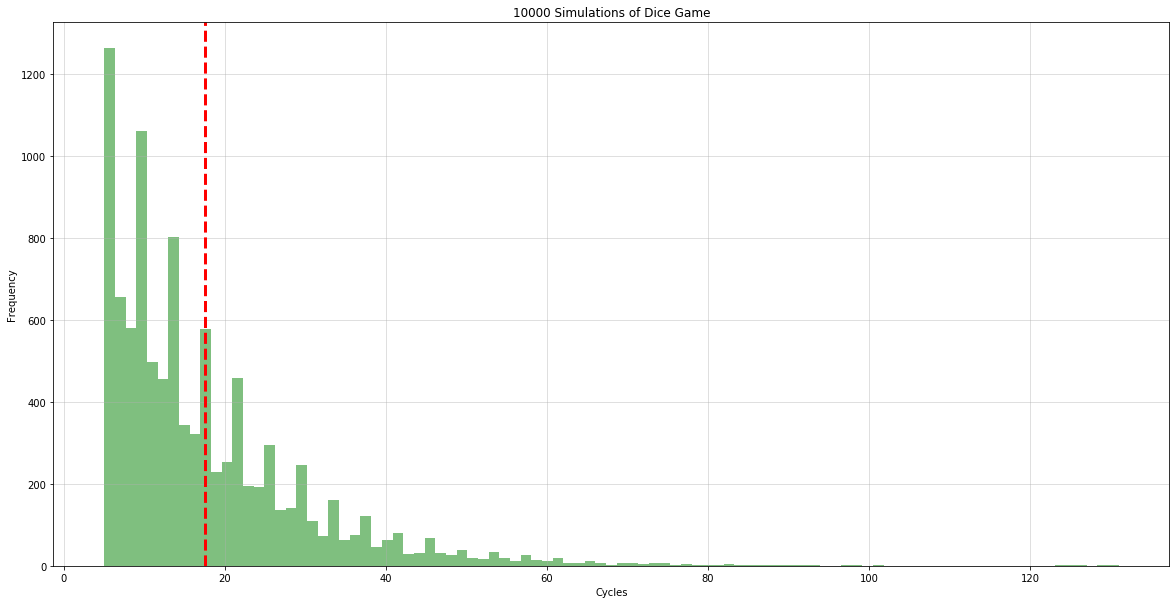

Mean # of cycles per game: 17.52
Standard Deviation of # of cycles per game: 12.71


In [54]:
_ = simulate_n_games(DiceGame, 10000)

The result of our simulation shows that the average game, across 10,000 games, lasted 17.52 cycles. We take this value to represent the Expected Value of the number of cycles in the Dice Roll Game. We also note that the distribution is Geometric in appearance. 

We can also see that the distribution shows that no game lasted fewer than 5 cycles. This makes sense, since, to lose a game, a player would have to give a coin in each of their first four turns, before being unable to give a coin on their fifth turn. There are some games that last for over 100 cycles, and the standard deviation, relative to the mean, is quite high at 12.45.

### Distribution of Errors

Since we are simulating the game 10,000 times, it would be interesting to see how the
Expected Value of the number of cycles varies across multiple simulations. Our hypothesis
prior to running this analysis is that the EV should be roughly the same (17.52), but have variance that
forms a normal distribution. To test this, we can run n simulations k times and plot
the resulting Expected Values.

This also helps us validate the EV number from the above single simulation of 10,000 iterations. Code for this has been provided in the appendix as get_mean_cycle_k_times.

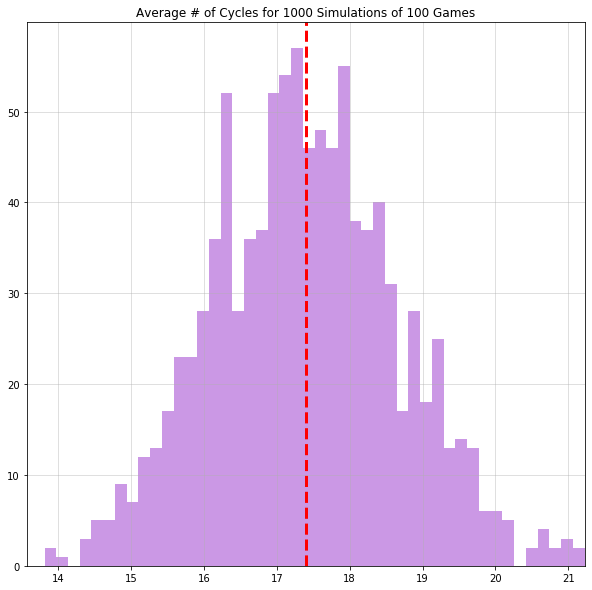

In [55]:
get_mean_cycles_k_times()

# note that the default values of k and n are used. 
# n is 100, not 10,000, for speed purposes.

As expected, the errors (distribution of the EVs of 1000 simulations, each of 100 iterations) appear to follow a normal distribution, with the mean centered at roughly 17.5.

### Futher Exploration

Below, we have conducted additional simulations with slight modifications to the data collection and rules. Code for the modified DiceRoll classes can be found in the appendix.

**Is a player's winning percentage improved based on if they get to go first?**

In [56]:
def simulate_n_games_winner(n=1000, plot=True, first='a'):
    winner = []
    for i in range(n):
        game = DiceGame(first=first)
        game.play_game()
        winner.append(game.winner)
        
    return len([i for i in winner if i == first])/n

In [58]:
simulate_n_games_winner(10000, 'a')  # says that when 'a' goes first, they win 50.4% of matches

0.504

In [59]:
from scipy.stats import binom_test

binom_test(5040, 10000, .5)

0.42952921410842676

The null hypothesis here is that getting the first turn does not increase the likelihood of winning the game. Winning is defined as *not* being the player who is unable to perform the required action.

Above, Player 'a' is arbitrarily chosen to go first. We can treat n=10000 iterations of the game as 10000
Bernoulli trials. Then, using a Binomial Distribution to compare the result (Player 'a' won 50.4% of games)
to the expected winning percentage (50%), we can see that the resulting p-value is .429, which is far above
the .05 we desire in order to reject the null at the 95% confidence level. Therefore, we cannot reject the null hypothesis that going first does not increase the likelihood of winning.

**What if we change the rules so that if a player rolls a 1, they have to give up a coin?**

This modification raises the probability from 3/6 to 4/6 that a player would have to give up a coin. Code is available in the appendix in the ModifiedDiceGame1 class.

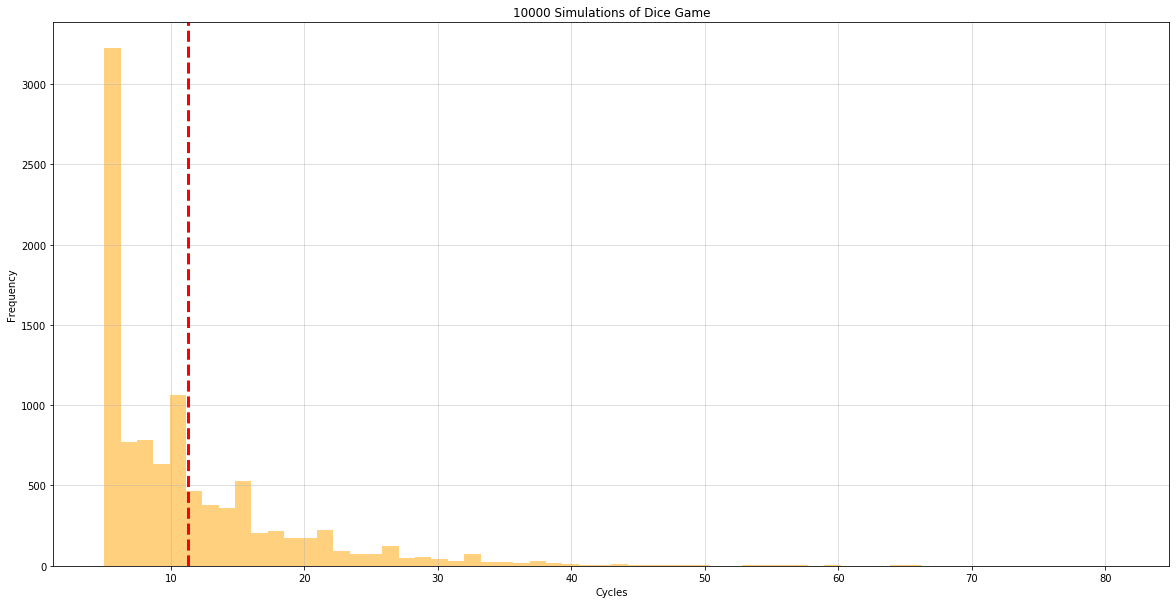

Mean # of cycles per game: 11.25
Standard Deviation of # of cycles per game: 7.52


In [60]:
_ = simulate_n_games(ModifiedDiceGame1, 10000)

The result above is expected. Since the odds that a player has to give up a coin are increased (by ~17%), players run out of coins faster, shrinking the Expected Value of the number of cycles from 17.52 to only 11.25.

**On the other hand, what if instead, rolling a 2 means a player gets *twice* as many coins as are currently in the pot?**

Code is in the appendix as the ModifiedDiceGame2x class.

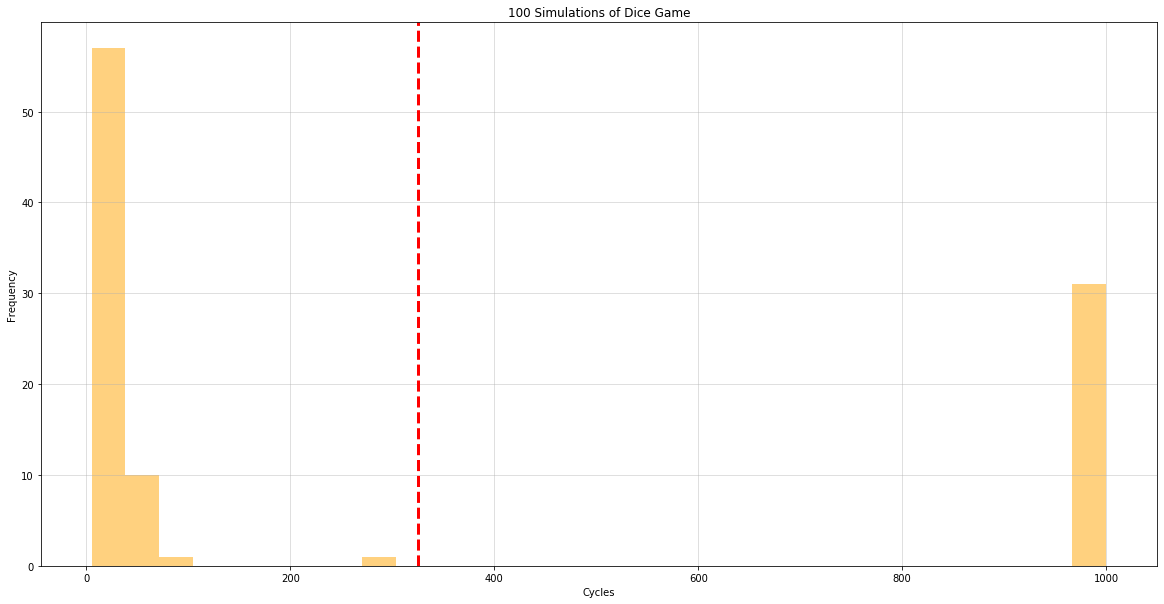

Mean # of cycles per game: 325.52
Standard Deviation of # of cycles per game: 453.11


In [50]:
_ = simulate_n_games(ModifiedDiceGame2x, 100)

The result above is jarring and shows how well-designed the game must be to avoid these 'blowups'. The EV for the number of cycles skyrocketed to 325.52, and that actually isn't even the true number. Since new coins were being added to the game, in some cases (roughly 30% of the time, as seen above), players kept increasing their pot sizes exponentially, essentially growing so large that going 'bankrupt' no longer was realistically possible. To avoid having the simulation run forver, I had to cap such games at 1000 cycles, so the EV is truly much higher. The high standard deviation confirms the extreme (infinite) upside in the number of cycles.

## Conclusion

Using the Mersenne Twister PRNG and other built-in python tools, we are very easily able to design and execute a simulation to assess expectations, rules, and strategies for games of chance. The Dice Roll Game simulated here shows that a delicate balance must be struck in the rules of the game to avoid creating a game that does not end, or one that ends too quickly. Through this simulation design, we were able to determine the Expected Value of the number of cycles in the game (17.52) and visualize its distribution. We found simulation to be a nimble, quick, and robust way to learn more about the game.

## Appendix

In [ ]:
def get_mean_cycles_k_times(k=1000, n=100):
    """
    This function calls the simulate_n_games function
    k times in order to determine the distribution
    of the expected values.
    """
    means = []
    for i in range(k):
        means.append(simulate_n_games(DiceGame, n, plot=False))

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.hist(means, color='darkorchid', alpha=.5, bins=min(k//10,50));
    ax.set_title("Average # of Cycles for " + str(k) + " Simulations of " + str(n) + " Games");
    mean_of_means = np.mean(means)
    std_of_means = np.std(means)
    plt.xlim((mean_of_means-3*std_of_means, mean_of_means+3*std_of_means))
    plt.axvline(mean_of_means, color='red', ls='--', lw='3')
    plt.grid(True, alpha=.5)


In [ ]:
class ModifiedDiceGame1:

    def __init__(self, first='a'):
        self.player_a = 4
        self.player_b = 4
        self.pot = 2
        self.cycles = 0
        self.first = first
        self.players = {'a':self.player_a,
                        'b':self.player_b}
        self.current_player = self.first
        self.winner = None
    
    def __roll(self):
        return random.randrange(6) + 1
    
    def play_game(self): 
        while True:
            if self.current_player == 'a':
                self.cycles +=1
            outcome = self.__roll()
            if self.cycles == 1:
                self.first = outcome

            if outcome == 2:
                self.players[self.current_player] += self.pot
                self.pot = 0
            elif outcome == 3:
                half_pot = self.pot // 2
                self.players[self.current_player] += half_pot
                self.pot -= half_pot
            else:  # now also includes 1, in addition to 4-6
                if self.players[self.current_player] == 0:
                    self.winner = 'a' if self.current_player == 'b' else 'b'
                    break
                self.players[self.current_player] -= 1
                self.pot += 1
            
            self.current_player = 'a' if self.current_player == 'b' else 'b'

In [ ]:
class ModifiedDiceGame2x:
    def __init__(self, first='a'):
        self.player_a = 4
        self.player_b = 4
        self.pot = 2
        self.cycles = 0
        self.first = first
        self.players = {'a':self.player_a,
                        'b':self.player_b}
        self.current_player = self.first
        self.winner = None
    
    def __roll(self):
        return random.randrange(6) + 1
    
    def play_game(self): 
        while True:
            if self.cycles == 1000:
                self.winner = 'draw'
                return
            if self.current_player == 'a':
                self.cycles +=1
            outcome = self.__roll()
            if self.cycles == 1:
                self.first = outcome

            if outcome == 1:
                continue
            elif outcome == 2:
                self.players[self.current_player] += 2*self.pot  # 2x coins instead of just 1x
                self.pot = 0
            elif outcome == 3:
                half_pot = self.pot // 2
                self.players[self.current_player] += half_pot
                self.pot -= half_pot
            else:
                if self.players[self.current_player] == 0:
                    self.winner = 'a' if self.current_player == 'b' else 'b'
                    break
                self.players[self.current_player] -= 1
                self.pot += 1
            
            self.current_player = 'a' if self.current_player == 'b' else 'b'